<center><div style="font-size: 50px"> <b>Title Here</b> </center>
<br><br><br>

<center><div style="font-size: 30px"> <b>Overview</b> </center>
In this tutorial, we aim to introduce you to the data science process. There are several steps to the data science pipeline: data collection, data processing, exploratory anaylsis/visualization, and hypothesis testing and machine learning.  The introduction will give you a brief overview of the data we will try to analyze as well as the motive in studying it.  Each subsequent section of this tutorial will walk the user through one of the key steps of data science.  All code is written in the Jupyter Notebook using Python.  

<center><div style="font-size: 30px"> <b>Introduction</b> </center>
The U.S. recently underwent a presidential election for the year of 2020. In one of the most highly contested and controversial elections of the nation, Joe Biden, the former Vice President under Barack Obama, defeated the incumbent president, Donald Trump. The election was surrounded in controversy, both in terms of the candidates who ran and the election outcome.

Our group chose to analyze data regarding voter turnout rates for the 2020 Presidential Election, and learn a little bit more about what happened in this election. Voter turnout is the percentage of eligible voters who cast a ballot in an election. Eligibility varies by country, and the voting-eligible population should not be confused with the total adult population. Age and citizenship status are often among the criteria used to determine eligibility, but some countries further restrict eligibility based on sex, race, or religion.

The right to vote is one of our hallmark rights, and every U.S. citizen should exercise this right. Our aim in analyzing this data is to share with our viewers a more comprehensive, analytical viewpoint of who voted this election. We hope to shed some light on what went right and wrong this election, and potentially expose some avenues on how we can make it easier to vote throughout the nation. 

The election of 2020 also presented circumstances unforeseen in our nation’s history. The Coronavirus pandemic, unlike anything seen before, the  has been ongoing for several months before the election. The pandemic has had unforeseen consequences in our society, such as introducing new social precautions and the preventing of most forms of public gatherings. Due to how widespread the pandemic has affected society, it can be argued that it has had an effect on voting on states most significantly impacted by it. We will seek to explore how the pandemic has affected voting in states most affected, and we hypothesize that states most affected by the pandemic will have had fewer votes than others. 

We will obtain both our election dataset and covid dataset from the website kaggle.com, the famous data science and machine learning hub, and it was provided via data.world by the government. 

<br><br><br><br>



<center><div style="font-size: 30px"> <b>Data Collection</b> </center>

The first thing we need to do is obtain the election data at https://www.kaggle.com/imoore/2020-us-general-election-turnout-rates?select=2020+November+General+Election+-+Turnout+Rates.csv.  We then read it into a dataframe using pandas, which allows us to perform operations on the rows and columns of data.  There are originally 15 columns in the election data, but we will filter some out and keep the most important ones.  Additionally, it is neccessary to change the format of some columns to a numeric type, such as total ballots counted, VEP turnout rate, and % non-citizen).  

In [6]:
## data collection
import pandas as pd 
import numpy as np

data = pd.read_csv('election_data.csv')
electional = pd.read_csv('county_statistics.csv')
data.head()

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
1,Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,NaN,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,Unofficial,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR


<br><br><br><br>
<center><div style="font-size: 30px"> <b>Data Processing</b> </center>

In [7]:
#code for data processing
#deleting columns with NaN values

del data['Source']
del data['Official/Unofficial']
del data['Vote for Highest Office (President)']
del data['Overseas Eligible']

numbers = ['Total Ballots Counted (Estimate)', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)','Prison', 'Probation', 'Parole', 'Total Ineligible Felon']

floaters = ['VEP Turnout Rate', '% Non-citizen']

#converting strings into proper number format
for c in numbers:
    data[c] = data[c].str.replace(',','')

for c in floaters:
    data[c] = data[c].str.replace('%','')

data[numbers] = data[numbers].astype('int')
data[floaters] = data[floaters].astype('float')

#creating a column for % citizen
data['% Citizen'] = 100 - data['% Non-citizen']

#regional column
west = ['Wyoming','Hawaii','Alaska','California','Nevada','Utah','Colorado','Washington','Oregon','Montana','Idaho']

midwest = ['North Dakota','Minnesota','South Dakota','Wisconsin','Iowa','Illinois','Nebraska','Kansas','Missouri','Ohio','Indiana','Michigan']

northeast = ['Maine','New York','New Jersey','New Hampshire','Massachusetts','Vermont','Rhode Island', 'Connecticut','Pennsylvania']

southeast = ['Maryland','District of Columbia','Delaware','West Virginia','Virginia','Kentucky','Tennessee','North Carolina','South Carolina','Georgia','Alabama','Louisiana','Arkansas','Mississippi','Florida']

southwest = ['Oklahoma','New Mexico','Arizona','Texas']

data['Region'] = data.State.apply(lambda x:
    'W' if x in west else ('MW' if x in midwest else ('NE' if x in northeast else ('SE' if x in southeast else( 'SW' if x in southwest else '--')))) ) 


#reordering columns
data = data[['State','Region','State Abv','Total Ballots Counted (Estimate)', 'VEP Turnout Rate','Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)','% Citizen','% Non-citizen','Prison', 'Probation', 'Parole', 'Total Ineligible Felon']]

def replacer(x):
    return x.fillna(0)

electional = pd.read_csv('county_statistics.csv')

electional = electional[['state','percentage20_Donald_Trump',
'percentage20_Joe_Biden','total_votes20','votes20_Donald_Trump','votes20_Joe_Biden','cases','deaths',]]

##COVID CASES NOVEMBER 1st
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

states_holder = []
d = electional.loc[electional['state'] == 'SC']
for s in states:
    d = electional.loc[electional['state'] == s]
    d = pd.DataFrame(d)
    states_holder.append(d)

for i in range(50):
    states_holder[i] = replacer(states_holder[i])    
    states_holder[i] = states_holder[i].groupby(['state'], as_index = False).sum()
    states_holder[i] = states_holder[i].rename(columns = {'state' : 'State Abv'})

electional = pd.concat(states_holder)

del electional['state']

final_data = pd.merge(electional, data, on = 'State Abv', how = 'left').dropna()
final_data = final_data.rename(columns = {'total_votes20' : 'Total votes',
'votes20_Donald_Trump' : 'Trump Votes', 'votes20_Joe_Biden' : 'Biden Votes'})

election_nums = ['Trump Votes', 'Biden Votes','cases','deaths']
final_data[election_nums] = final_data[election_nums].astype('int')

final_data = final_data[['State','Region','Trump Votes','Biden Votes','cases','deaths','Total Ballots Counted (Estimate)', 'VEP Turnout Rate','Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)','% Citizen','% Non-citizen']]

final_data['Covid Cases to Population Ratio'] = (final_data['cases'] / final_data['Voting-Age Population (VAP)']) * 100

final_data

,State,Region,Trump Votes,Biden Votes,cases,deaths,Total Ballots Counted (Estimate),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Citizen,% Non-citizen,Covid Cases to Population Ratio
0,Alabama,SE,1434159,843473,193985,2973,2306587,62.6,3683055,3837540,97.7,2.3,5.054931
1,Alaska,W,148624,102080,16705,83,367000,69.8,525568,551117,96.6,3.4,3.031117
2,Arizona,SW,1651812,1663447,247473,5979,3400000,65.5,5189000,5798473,91.1,8.9,4.267899
3,Arkansas,SE,757052,418051,113057,1958,1212030,55.5,2182375,2331171,96.4,3.6,4.849794
4,California,W,5416035,10339137,935878,17671,16800000,64.7,25962648,30783255,85.0,15.0,3.040218
5,Colorado,W,1347516,1783149,109910,2288,3295000,76.4,4313054,4595504,94.3,5.7,2.391685
6,Connecticut,NE,714176,1079168,71207,4616,1850000,71.1,2603327,2839560,92.3,7.7,2.507677
7,District of Columbia,SE,16306,285728,17369,646,350000,64.7,540685,582065,92.9,7.1,2.984031
8,Delaware,SE,200603,296268,25126,710,507805,70.5,720531,780822,94.2,5.8,3.217891
9,Florida,SE,5667474,5294767,807412,16789,11150000,71.7,15551739,17543341,89.9,10.1,4.602384


<br><br><br><br>
<center><div style="font-size: 30px"> <b>Data Analysis/Visualization</b> </center>

The next step of the data science process is data analysis.  This is the part where we explore any patterns and patterns in our data. To do this, we will create several graphs to help us visually see any trends.  Graphs can be easily created using the matplotlib.pyplot libary in python.  

Text(0, 0.5, 'Percentage (%)')

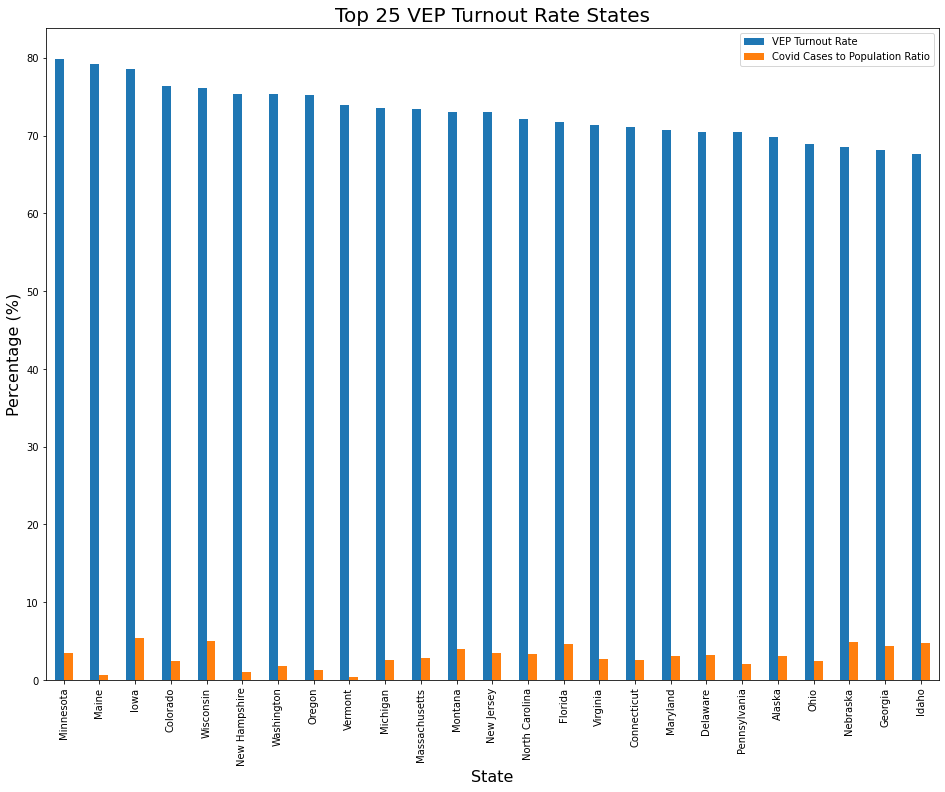

In [8]:
#code for data analyis/visualization
import matplotlib.pyplot as plt
import seaborn as sb
top10 = final_data.nlargest(25, 'VEP Turnout Rate')
bottom10 = final_data.nsmallest(25, 'VEP Turnout Rate')
top10.set_index('State', inplace = True)
top10[['VEP Turnout Rate', 'Covid Cases to Population Ratio']].plot(kind = 'bar', figsize =(16,12))
plt.title('Top 25 VEP Turnout Rate States', fontsize = 20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)

Text(0, 0.5, 'Percentage (%)')

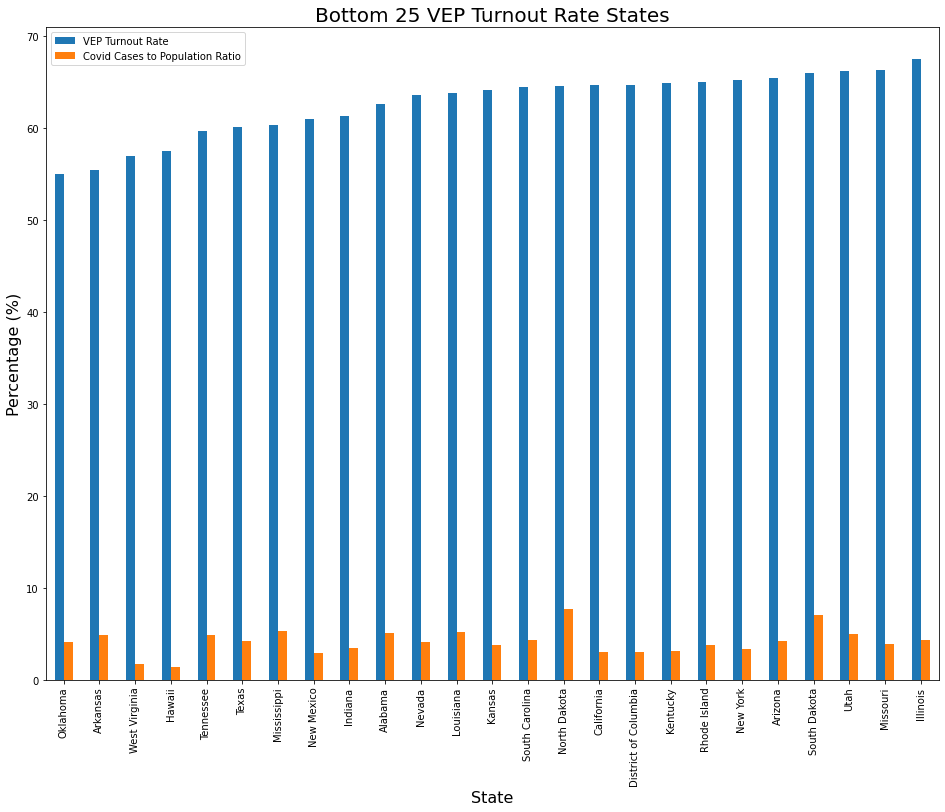

In [36]:
bottom10 = final_data.nsmallest(25, 'VEP Turnout Rate')
bottom10.set_index('State', inplace = True)
bottom10[['VEP Turnout Rate', 'Covid Cases to Population Ratio']].plot(kind = 'bar', figsize =(16,12))
plt.title('Bottom 25 VEP Turnout Rate States', fontsize = 20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)

The 2 bar graphs above show data for the top 25 and bottom 25 turnout rate states, respectively.  With State on the x-axis and perecentage on the y-axis, these double bar graphs show both the turnout rate and the covid rate for each state.  Before we do any type of analysis, at first glance, it seems like the states with highest turnout have generally lower covid rates compared to the states with the lowest turnout.  Below, we aim to perform linear regression analysis of whether or not this is true.  

Slope of Regression Line: -0.07621091028055611


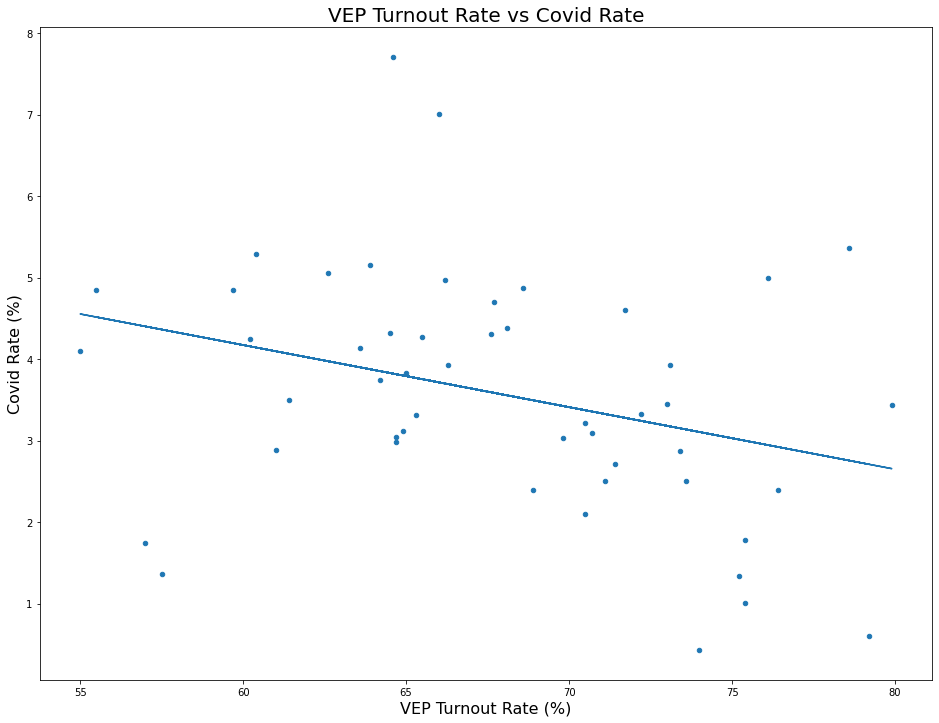

In [37]:
final_data.plot.scatter(x='VEP Turnout Rate', y='Covid Cases to Population Ratio', figsize=(16,12))
plt.xlabel('VEP Turnout Rate (%)', fontsize=16)
plt.ylabel('Covid Rate (%)', fontsize=16)
plt.title('VEP Turnout Rate vs Covid Rate', fontsize=20)
r, intercept = np.polyfit(final_data['VEP Turnout Rate'], final_data['Covid Cases to Population Ratio'], 1)
plt.plot(final_data['VEP Turnout Rate'], r*final_data['VEP Turnout Rate'] + intercept)
print("Slope of Regression Line: " + str(r))

The scatter plot above plots the relationship between VEP Turnout Rate (x-axis) and Covid Rate (y-axis).  From looking at the plot itself, it doesn't seem like VEP Turnout Rate and Covid Rate have a strong linear relationship.  However, after adding a trend line, we can see that there is a general downward trend, with the covid rate decreasing on average around 0.076% for each percent increase in VEP Turnout Rate. 

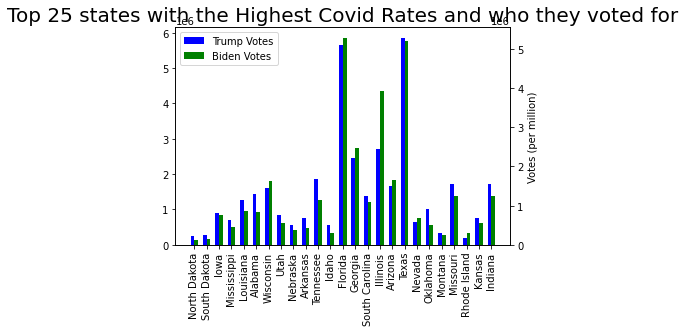

In [5]:
top25 = final_data.nlargest(25, 'Covid Cases to Population Ratio')

x = np.arange(25)
ax1 = plt.subplot(1,1,1)
w = 0.3

plt.xticks(x + w/2, top25['State'], rotation = 'vertical')
popper = ax1.bar(x, top25['Trump Votes'], width = w, color ='b',align = 'center', log = False )

ax2 = ax1.twinx()
popper2 = ax2.bar(x +w,top25['Biden Votes'],width = w,color='g',align = 'center', log = False)

plt.xlabel('States')
plt.ylabel('Votes (per million)')
plt.legend([popper,popper2],['Trump Votes','Biden Votes'])
plt.title('Top 25 states with the Highest Covid Rates and who they voted for', fontsize=20)
plt.show()

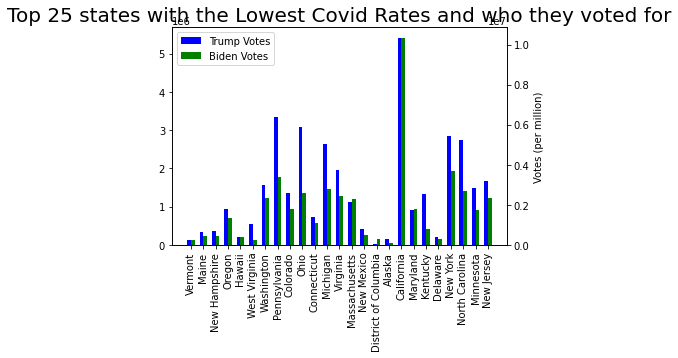

In [39]:
bottom25 = final_data.nsmallest(25, 'Covid Cases to Population Ratio')

x = np.arange(25)
ax1 = plt.subplot(1,1,1)
w = 0.3

plt.xticks(x + w/2, bottom25['State'], rotation = 'vertical')
popper = ax1.bar(x, bottom25['Trump Votes'], width = w, color ='b',align = 'center', log = False )

ax2 = ax1.twinx()
popper2 = ax2.bar(x +w,bottom25['Biden Votes'],width = w,color='g',align = 'center', log = False)

plt.ylabel('Votes (per million)')
plt.xlabel('States')
plt.legend([popper,popper2],['Trump Votes','Biden Votes'])
plt.title('Top 25 states with the Lowest Covid Rates and who they voted for', fontsize=20)
plt.show()

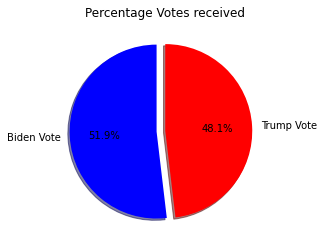

In [17]:
#result
biden_total = final_data['Biden Votes'].sum()
trump_total = final_data['Trump Votes'].sum()
total = biden_total + trump_total
slices = [biden_total,trump_total]
acts = ['Biden Vote','Trump Vote']
cols = ['b','r']
plt.pie(slices,labels=acts,colors=cols,startangle=90,shadow=True,autopct='%1.1f%%',explode=(0.1,0))
plt.title('Percentage Votes received')
plt.show()


<br><br><br><br>
<center><div style="font-size: 30px"> <b>Hypothesis Testing/ML</b> </center>

In [40]:
#code for hypothesis testing/ML


<br><br><br><br>
<center><div style="font-size: 30px"> <b>Analysis</b> </center>